## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
print(df.dtypes)
print(df.info())


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
normal_share, fraud_share

(99.82725143693798, 0.1727485630620034)

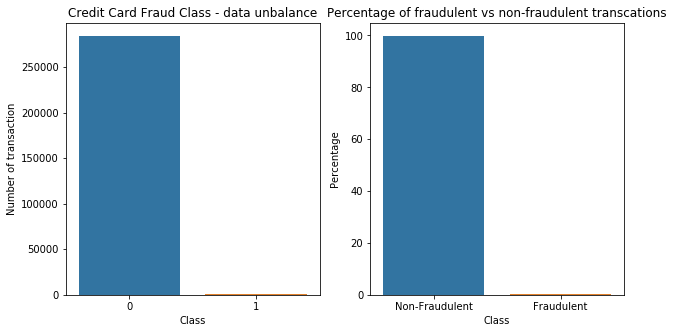

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()


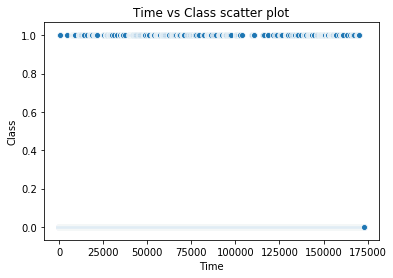

In [7]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

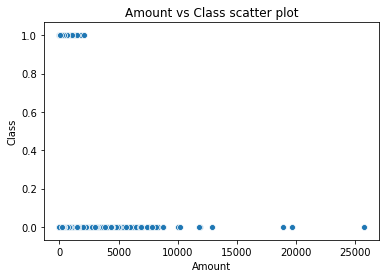

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

In [9]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

### Splitting the data into train & test data

In [10]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [14]:
#scaling Amount feature

scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

### Plotting the distribution of a variable

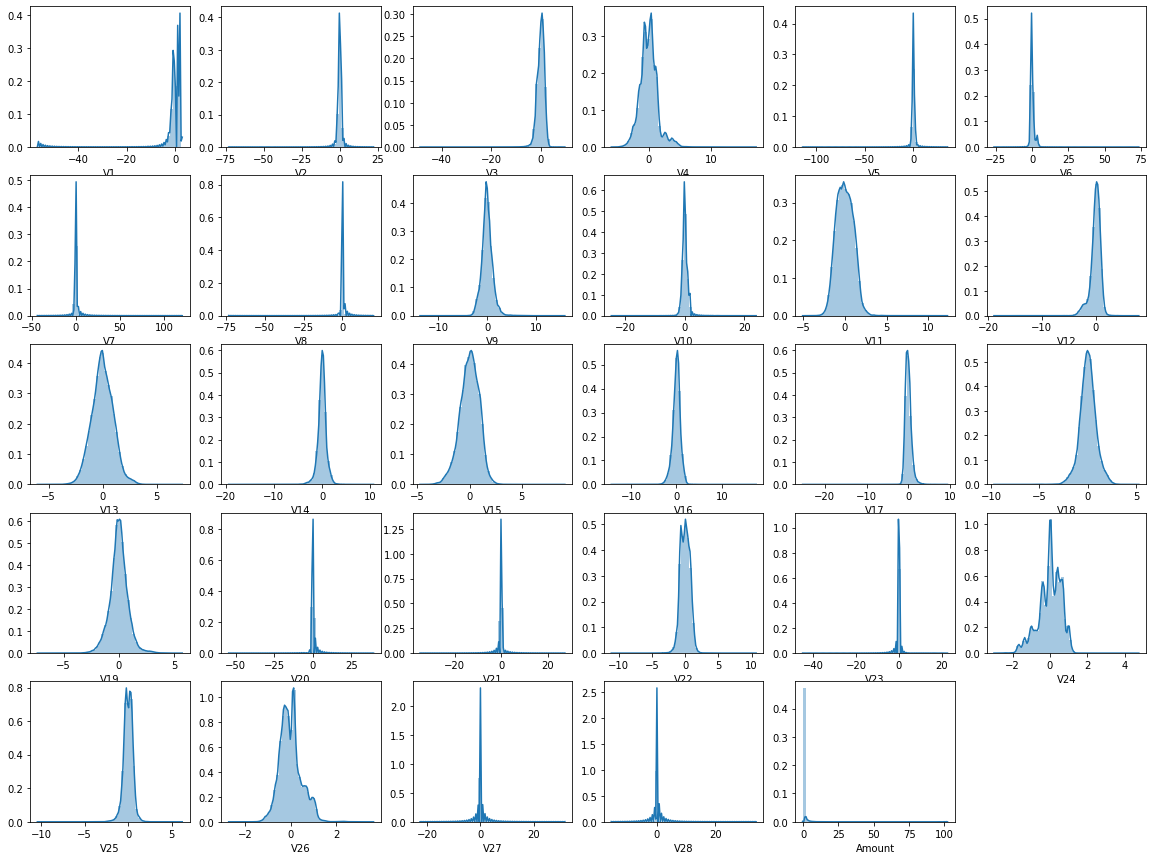

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [16]:
#Identifying skewed data points (skewness >+1 or skewness <-1)

var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

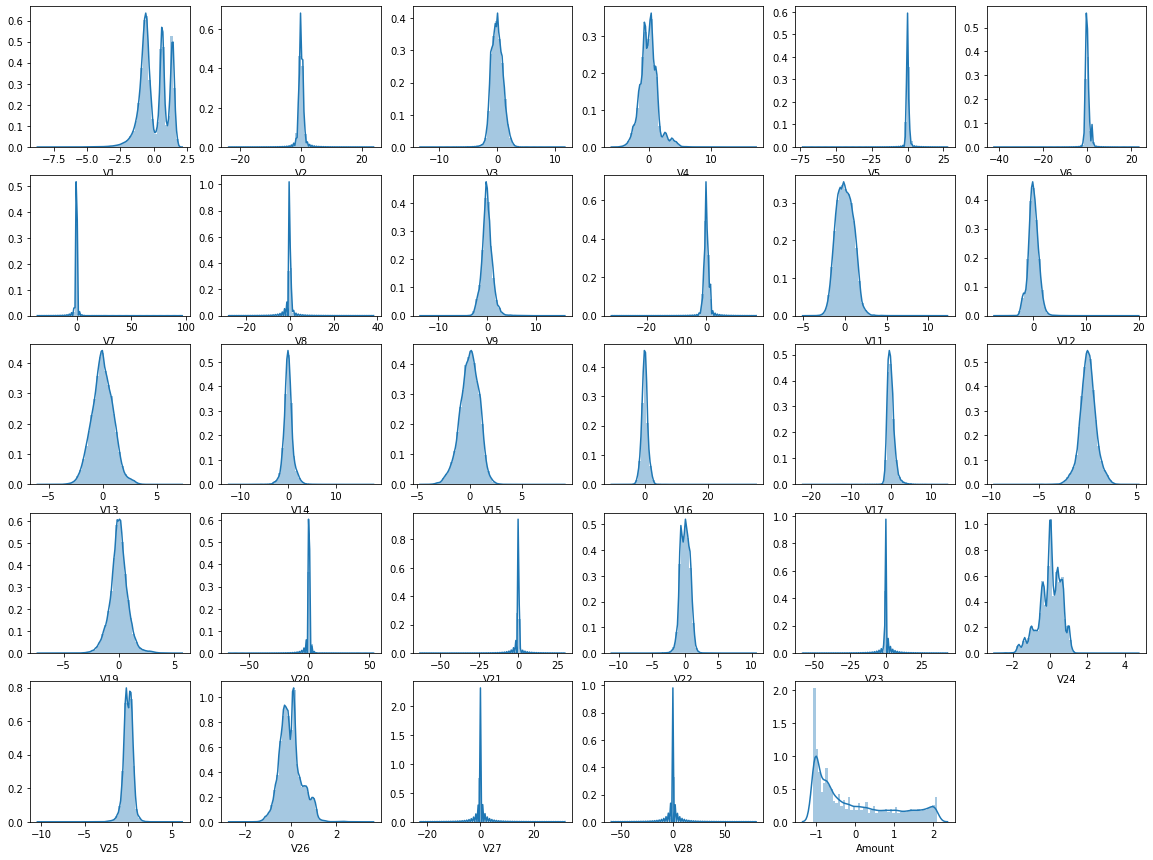

In [18]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [19]:
# Logistic Regression with gridsearch
params = {"C": [0.01, 0.1, 1]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best ROC AUC score:  0.9825828722496859
Best hyperparameters:  {'C': 0.01}


In [23]:
#Logistic Regression Optimal Params
lg_imb = LogisticRegression(C=0.01)
lg_imb.fit(X_train, y_train)
y_pred = lg_imb.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

F1 Score: 72.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



# Decision Tree

In [25]:
# Decision Tree with gridsearch
params = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best ROC AUC score:  0.945712199655871
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [27]:
# Decision Tree with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

y_pred = dt_imb_model.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")


F1 Score: 61.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



# XGBOOST

In [28]:
# XGBOOST with gridsearch
from xgboost import XGBClassifier
params = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = XGBClassifier(max_depth=2, n_estimators=200),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9829854062533343
Best hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.9}


In [29]:
#Fitting XGBOOST with optimal parameters

params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)
y_pred = xgb_imb_model.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

[11:52:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 Score: 86.49%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## XGBOOST is the best model of the 3

In [30]:
clf = XGBClassifier(params = params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

[13:05:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 Score: 86.49%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


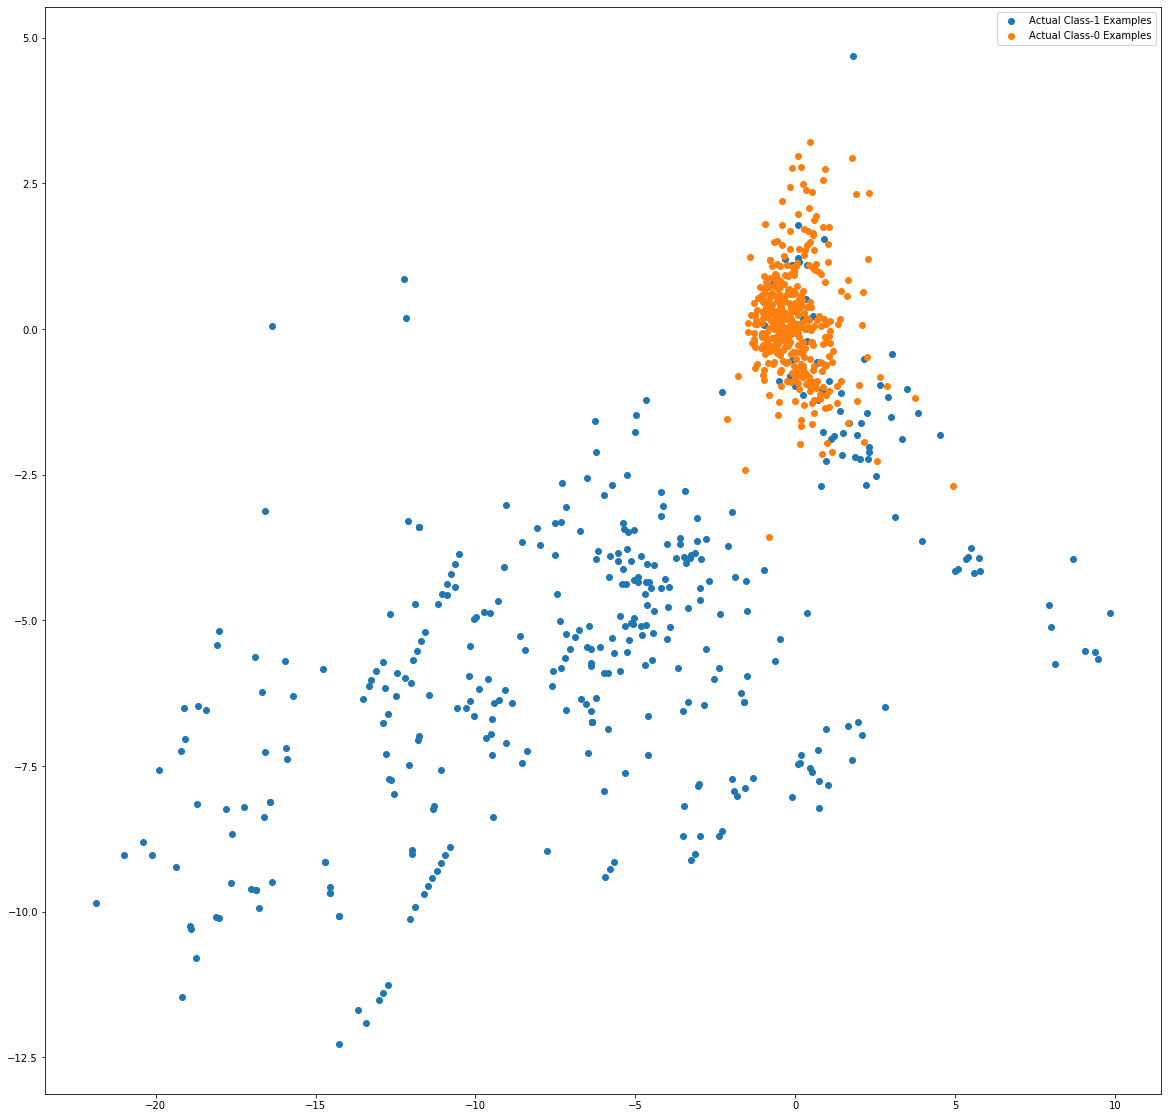

In [31]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balanced Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling on logistic regression

In [42]:
from imblearn.over_sampling import RandomOverSampler

# Random oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9883717683363191
Best hyperparameters:  {'C': 1000}


In [43]:
#Logistic Regression (balanced) Optimal Params
lg_bal = LogisticRegression(C=1000)
lg_bal.fit(X_over, y_over)
y_pred = lg_bal.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

F1 Score: 10.14%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



F1 Score is low, but recall is high

In [45]:
#Logistic Regression (balanced) Optimal Params
lg_bal = LogisticRegression(C=0.01)
lg_bal.fit(X_over, y_over)
y_pred = lg_bal.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

F1 Score: 10.47%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



### Random Oversampling on xgboost

In [34]:
params = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = XGBClassifier(max_depth=2, n_estimators=200),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.999990382668769
Best hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.6}


In [36]:
#Fitting XGBOOST with optimal parameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_bal = XGBClassifier(params = params)
xgb_bal.fit(X_over, y_over)
y_pred = xgb_bal.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

[14:07:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 Score: 85.26%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### SMOTE

In [39]:
import warnings
from imblearn import over_sampling
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


#### Logistic Regression

In [40]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9900331152742534
Best hyperparameters:  {'C': 1000}


In [47]:
lg_smote = LogisticRegression(C=1000)
lg_smote.fit(X_train_smote, y_train_smote)
y_pred = lg_smote.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

F1 Score: 9.58%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



##### Build models on other algorithms using SMOTE

### XGBOOST

In [48]:
params = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = XGBClassifier(max_depth=2, n_estimators=200),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9999411917170142
Best hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.3}


In [49]:
#Fitting XGBOOST with optimal parameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
xgb_bal = XGBClassifier(params = params)
xgb_bal.fit(X_train_smote, y_train_smote)
y_pred = xgb_bal.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

[15:51:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 Score: 79.63%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.88      0.80        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



### Logistic Regression with ADASYN

In [50]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)


In [51]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9657106789385377
Best hyperparameters:  {'C': 1000}


In [52]:
lg_adasyn = LogisticRegression(C=1000)
lg_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred = lg_adasyn.predict(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

F1 Score: 3.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



##### XGBOOST

In [53]:
params = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = XGBClassifier(max_depth=2, n_estimators=200),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.99983569591639
Best hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.9}


In [54]:
#Fitting XGBOOST with optimal parameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_adasyn = XGBClassifier(params = params)
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred = xgb_adasyn.predict(X_test)
y_train_proba = xgb_adasyn.predict_proba(X_train_adasyn)
y_pred_proba = xgb_adasyn.predict_proba(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

[16:14:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 Score: 74.89%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.84      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### XGBOOST model with SMOTE gives best results

In [59]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
xgb_bal = XGBClassifier(params = params)

In [60]:
# perform the best oversampling method on X_train & y_train

clf = xgb_bal  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote) # fit on the balanced dataset
y_train_proba = clf.predict_proba(X_over)
y_pred_proba = clf.predict_proba(X_test)
print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

[16:38:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


F1 Score: 74.89%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.84      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


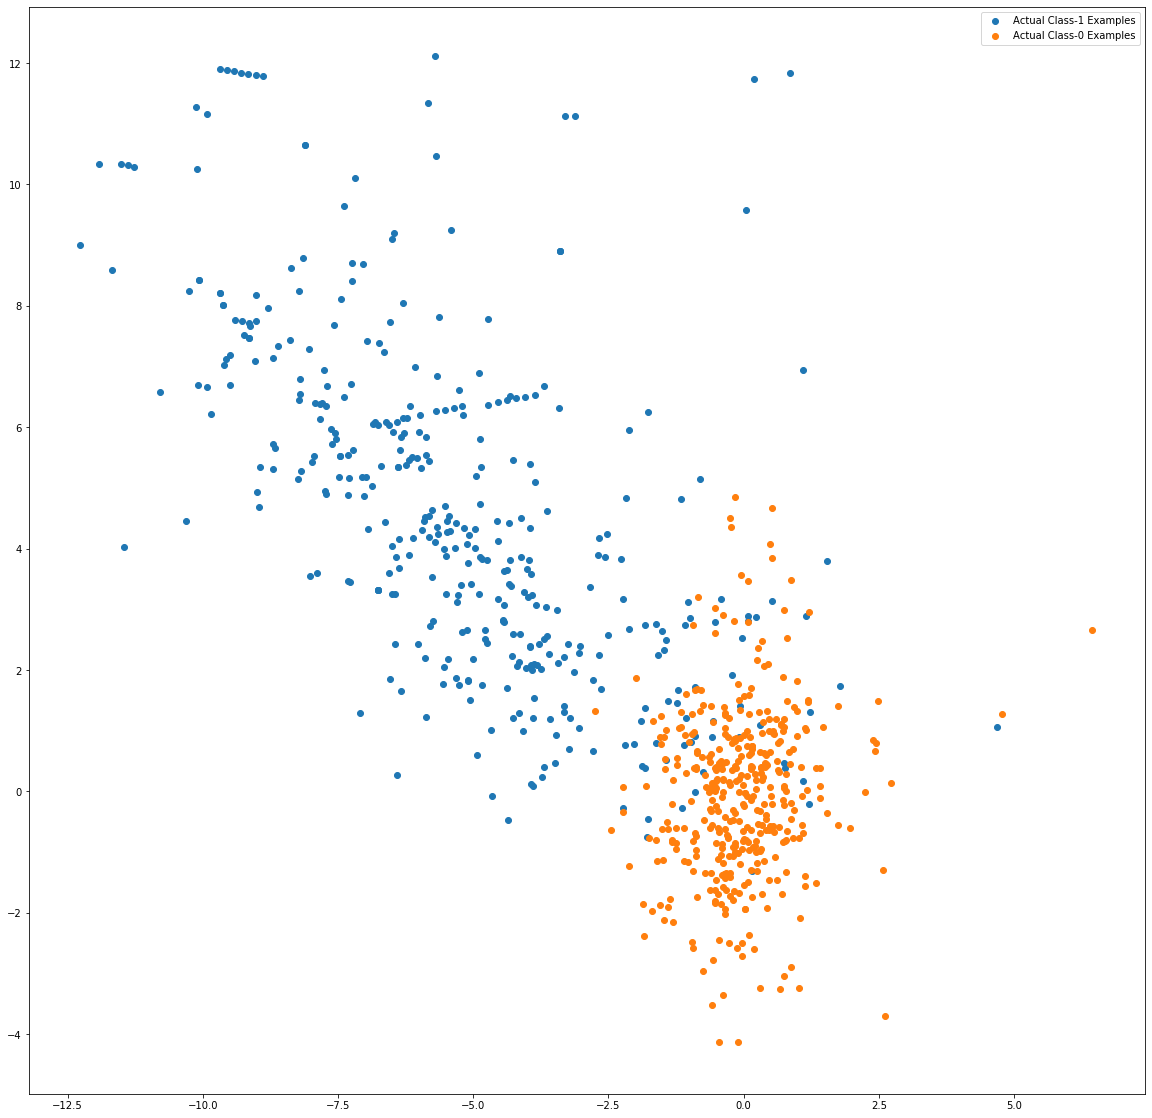

In [58]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [62]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_proba[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_proba[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)



Train auc = 0.9999999878996304
0.6367008


## Recommendation

Since this is a fraud detection problem we recommend choosing model with high recall along with a good F1-Score. XGBOOST model with SMOTE oversampling is giving the best results so far

## Isolation Forest

Isolation forest also can be used for detecting anomalies. A quick experiment to test the same

In [63]:
from sklearn.ensemble import IsolationForest
is_f = IsolationForest(random_state=0).fit(X_train)
y_pred_is_f = is_f.predict(X_test)

In [64]:
y_pred_is_f[:3]

array([ 1,  1, -1])

In [65]:
replacements = {1:0, -1:1}
replacer = replacements.get  # For faster gets.

y_pred_final = [replacer(n, n) for n in y_pred_is_f]

In [66]:
print(f"F1 Score: {round(f1_score(y_test, y_pred_final)*100,2)}%") 
print(f"Classification Report: \n {classification_report(y_test, y_pred_final)}")

F1 Score: 7.19%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.81      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.89      0.53     56962
weighted avg       1.00      0.96      0.98     56962

